# Converting Lists to Data Frames

In [1]:
from plotnine import *
import pandas as pd


x = [3,7,4,1,5]s
y = [7,10,6,4,8]
y_hat = [3.2+0.95*i for i in x]

df = pd.DataFrame(list(zip(x,y,y_hat)), 
               columns =['x', 'y','y_hat']) 
df


,x,y,y_hat
0,3,7,6.05
1,7,10,9.85
2,4,6,7.00
3,1,4,4.15
4,5,8,7.95


# Plotting Multiple Plots in Same Graph

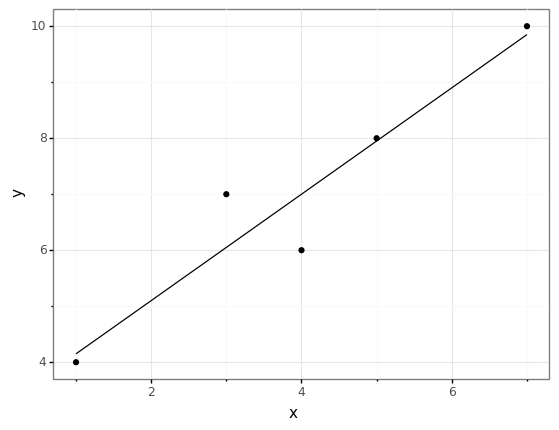

<ggplot: (303667617)>

In [2]:
(
    ggplot(df,aes(x='x',y='y'))
    +geom_point()+geom_line(aes(y='y_hat'))
    +theme_bw()
)

# Validation

##### Import relevant libraries and functions

In [3]:
from plotnine import *
import pandas as pd
from sklearn.linear_model import LinearRegression # get linear regression function
from sklearn.metrics import r2_score
import numpy as np

##### Use diabetes data as example

In [4]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # specify columns
df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target # target or independent variable comes separately

##### Train on 80% data, test on remaining 20%

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test) # predicted y values using best-fit line
predictions[0:5]

array([187.63337155, 183.24121932,  80.2688253 , 155.5548405 ,
       174.49636767])

##### Use the following two ways of getting R-squared value for model

In [7]:
print(r2_score(y_test,predictions)) # computed using the observed y values and predicted y values of test set
print(lm.score(X_test,y_test)) # computed using the observed x and y values of test set (automatically computes predicted)

0.5492186820296487
0.5492186820296487


# k-Fold Cross Validation

##### Load the relevant function. cross_val_score directly computes the R-squared score for each fold validation

In [8]:
from sklearn.model_selection import cross_val_score

##### Using diabetes data in df, and target variable in y, get 5-fold cross validation R-squared values

In [20]:
scores = cross_val_score(lm,df,y,cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
Accuracy: 0.48 (+/- 0.10)


# Transformations

##### Using a data set that does not have clear linear relationship

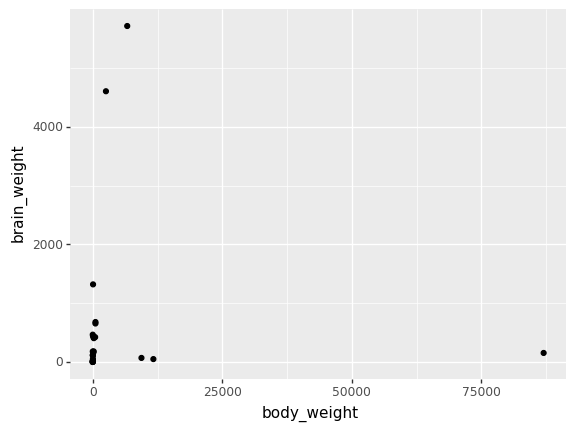

<ggplot: (308500641)>

In [23]:
data = pd.read_csv("brains.csv")
ggplot(data,aes(x='body_weight',y='brain_weight'))+geom_point()#+geom_smooth(method="lm")

##### We can apply log transformations on both x and y variables and see if a linear relationship becomes clearer

In [24]:
import math
data['body_weight'] = data['body_weight'].apply(lambda x:math.log(x)) # apply math.log to a column value
data['brain_weight'] = data['brain_weight'].apply(lambda x:math.log(x))

##### Now graph the scatter plot again, and the linear relationship is much clearer

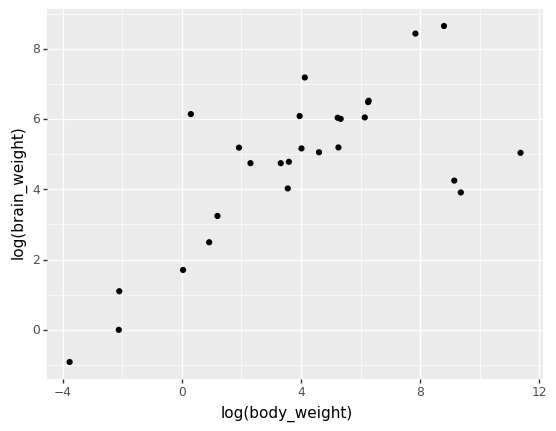

<ggplot: (308411077)>

In [27]:
(
    ggplot(data,aes(x='body_weight',y='brain_weight'))
    +geom_point()
    +labs(x="log(body_weight)",y="log(brain_weight)")
    #+geom_smooth(method="lm")
)

# Transformation (Standardizing)

##### Standardize features by removing the mean and scaling values to unit variance (Z scores)

##### Load relevant function and data

In [28]:
from sklearn.preprocessing import StandardScaler

hours = [3,7,4,1,5] # number of hours of study
avg_grade = [75,80,68,55,89] # avg grade out of 100 in class
score = [7,10,6,4,8] # score received on test
df = pd.DataFrame(list(zip(hours,avg_grade,score)), 
               columns =['hours', 'avg_grade','score']) 



##### Run a simple Linear Regression using hours and avg_grade as predictors

In [29]:
X = df[['hours','avg_grade']] # independent variables
lm = LinearRegression() # initialize linear regression model
lm.fit(X,df[['score']]) # fit the model
pred_score = lm.predict(X) # predict score for observed values
r2_score(df[['score']],pred_score) # get R-squared value

0.9276009955964006

##### We now run the model by first standardizing our independent variables

In [30]:
scaler = StandardScaler()
scaler.fit(X)
tfd_X = scaler.transform(X)

print(tfd_X)

[[-0.5         0.13955847]
 [ 1.5         0.5756787 ]
 [ 0.         -0.47100984]
 [-1.5        -1.60492243]
 [ 0.5         1.36069511]]


##### We now fit the model

In [31]:
lm = LinearRegression()
lm.fit(tfd_X,df[['score']])
pred_score = lm.predict(tfd_X)
r2_score(df[['score']],pred_score)


0.9276009955964006